In [17]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("/home/piotr/Documents/mgr/uwb-rs/data-processing/data/2023-05-17-20:51:29.418430P4.csv")
fig = px.box(data, x="anchor", y="distance", points="all")
fig.show()

In [18]:
df = data.drop(columns=['timestamp'])
df.groupby(["anchor"]).mean()

,Unnamed: 0,distance,instant
anchor,,,
0x26bd,904.5,4537.464746,8.055449e+10
0x5601,905.0,4506.243353,8.168863e+10
0x6c0d,904.0,3674.357153,8.088113e+10


Circle(1016.5462373449362, 2151.627477243416, 1295.2766544107028)
242.51254101058512


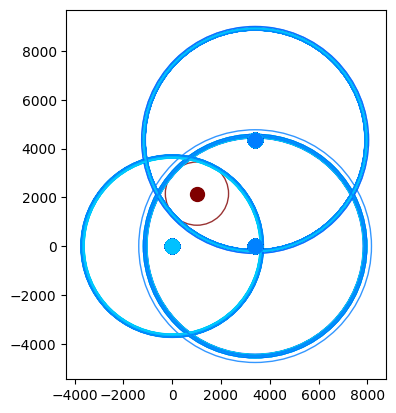

In [19]:
# from coords import COORDS
from easy_trilateration.model import *
from easy_trilateration.least_squares import easy_least_squares
from easy_trilateration.graph import *
from helpers import distance

COORDS = {
    "0x6c0d": (0,0),
    "0x5601": (3400,0),
    "0x26bd": (3400, 4350),
    "T": (775, 2130),
}

arr = [Circle(COORDS[row["anchor"]][0], COORDS[row["anchor"]][1], row["distance"]) for _, row in df.iterrows()]

# arr = [Circle(100, 100, 50),  
# Circle(100, 50, 50),
# Circle(50, 50, 50),
# Circle(50, 100, 50)]
          
result, meta = linear(arr)  
print(result)
print(distance(result.center, Point(*COORDS["T"])))
create_circle(result, target=True)  
draw(arr)

In [21]:
n_samples = []
errors = []

for i in range(3,min(len(df), 100),3):
    arr = [Circle(COORDS[row["anchor"]][0], COORDS[row["anchor"]][1], row["distance"]) for _, row in df.head(i).iterrows()]
    # display(arr)
    # arr = [Circle(100, 100, 50),  
    # Circle(100, 50, 50),
    # Circle(50, 50, 50),
    # Circle(50, 100, 50)]
            
    result, meta = easy_least_squares(arr)  
    # print(result)
    n_samples.append(i)
    errors.append(distance(result.center, Point(*COORDS["T"])))
    # create_circle(result, target=True)  
    # draw(arr)
df2 = pd.DataFrame({"n_samples": n_samples, "error": errors})
# display(df2)
px.bar(df2, x="n_samples", y="error")